#### In this notebook, i will implement a neural network in three ways:
1. Without the use of any deeplearning frameworks
2. using Pytorch
3. Using Tensorflow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit #this is for sigmoid function
from scipy.special import softmax #this is for softmax

In [2]:
data = pd.read_csv('./DIGIT_DATA/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
data = np.array(data)

In [6]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [7]:
m,n = data.shape  ##no of datapoints, pixel in a image

In [8]:
np.random.shuffle(data)

In [9]:
train_data = data[0:int(0.8*m), :]  # simply we are dividing the data into 80-20, for training and testing, int(0.8*m) will give 80% of m, no of data points
val_data = data[int(0.8*m):m,:]

In [10]:
#now train_data has both the training features and labels, so we must seperate the labels from the features

X_train = train_data[:,1:].T #features for the training
Y_train = train_data[:,0]  #labels for the training
X_val = val_data[:,1:].T
Y_val = val_data[:,0]

In [11]:
print(X_train.shape,
Y_train.shape,
X_val.shape,
Y_val.shape)

(784, 33600) (33600,) (784, 8400) (8400,)


In [12]:
#now we need to scale the input, so that it can be between 0-1 rather then 0-255
#This transformation effectively helps the neural network learn more efficiently and leads to better performance overall.

X_train = X_train/255.0
X_val = X_val/255.0

#### now building the model
we will need 4 basic functions
1. to initialize the weights and biases with random variables at the start
2. Foward propogation
3. Backpropogation
4. Update Parameters

In [ ]:
# SIDE NOTE: Creating random arrays in numpy
arr1 = np.random.rand(10) #1D
arr2 = np.random.rand(10,2) #2d dimention 10,2
arr2

In [ ]:
# now we want how many weights?
# for first Hidden layer H1, we have 784 inputs and 10 NN Unit in the layer, and each input will be given to each NN unit
# so We want total of 10*786 weights

# By subtracting 0.5, the weights are centered around zero. This has several benefits:
# Balanced Activation: A balance of positive and negative weights allows for more versatile activation patterns.
# Gradient Flow: Centered weights help maintain an appropriate range of activations throughout the network, promoting better gradient flow during backpropagation.

def initialize_weights():
    W1 = np.random.rand(10,784) - 0.5
    B1 = np.random.rand(10,1) - 0.5
    
    W2 = np.random.rand(10,10) - 0.5
    B2 = np.random.rand(10,1) -0.5

    return W1,B1,W2,B2

In [ ]:


# In forward propogation what we are doing finding Z1, A1, Z2, A2 like this:
# Z1 = W1.A0(or input) + B1
# A1 = activation_function(Z1) --which can be sigmoid or relu
# Z2 = W2.A1 + B2
# A2 = activation_function_for_output(Z2) --which is softmax

def ReLU(X):
  return np.maximum(X, 0)

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + B2
  A2 = softmax_calculator(Z2)
  return Z1, A1, Z2, A2

In [ ]:
# before backpropogation we need to make the labels in one hot incoding format
# Suppose you have three classes: Cat, Dog, and Rabbit.
# The integer labels for these classes could be:
# Cat: 0
# Dog: 1
# Rabbit: 2
# The one-hot encoded vectors would be:
# Cat: [1, 0, 0]
# Dog: [0, 1, 0]
# Rabbit: [0, 0, 1]

#one_hot_encoded = np.zeros((len(labels), len(classes)))

def one_hot_encoding(Y):
    one_hot_Y = np.zeros((Y.size,Y.max() + 1)) # 10 - because there are 10 labels 0-9

    one_hot_Y[np.arange(Y.size),Y] = 1 #one_hot_Y[0, 0] = 1  # For label 0
                                        # one_hot_Y[1, 1] = 1  # For label 1
                                        # one_hot_Y[2, 2] = 1  # For label 2
                                        # one_hot_Y[3, 1] = 1  # For label 1 again
    return one_hot_Y.T
    


In [ ]:
# now we need prediction after the foward pass
def Prediction(A2):
    return np.argmax(A2,0)

def Accuracy(Prediction_matrix, Y):
    return np.sum(Prediction_matrix==Y)/Y.size

In [ ]:
# for backpropogation we calculate the partial derivatives of the loss function, calculations done in notes

def backward_propagation (W1, B1, W2, B2,Z1, A1, Z2, A2, X, Y):
    one_hot_Y = one_hot_encoding(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1)
    return dW1, dB1, dW2, dB2
    

In [ ]:
# now we update the parameters from the backpropogation derivatives

def update_parameters(W1,B1,W2,B2,dW1,dB1,dW2,dB2,learning_rate):
    W1 = W1 - learning_rate * dW1
    B1 = B1 - learning_rate * dB1
    W2 = W2 - learning_rate * dW2
    B2 = B2 - learning_rate * dB2
    return W1, B1, W2, B2

In [23]:
# lets now build the model

def Gradient_descent(X,Y,alpha, iterations): #alpha is learning_rate
    W1, B1, W2, B2 = initialize_weights()

    for i in range(iterations):
        Z1, A1, Z2, A2 =  forward_propagation(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2,Z1, A1, Z2, A2, X, Y)
        W1, B1, W2, B2 = update_parameters(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha)
        if(i%20 == 0):
            print(Accuracy(Prediction(A2),Y))
    return W1, B1, W2, B2




In [26]:
W1, B1, W2, B2 = Gradient_descent(X_train,Y_train,0.1,1500)

0.09047619047619047
0.1400595238095238
0.20425595238095237
0.3225595238095238
0.42485119047619047
0.4855059523809524
0.5348214285714286
0.5805059523809524
0.6199404761904762
0.6527380952380952
0.6812797619047619
0.7080654761904762
0.7293452380952381
0.7457738095238096
0.7591071428571429
0.7716071428571428
0.7805952380952381
0.7892857142857143
0.79625
0.8018154761904762
0.8075892857142857
0.8127083333333334
0.8169940476190476
0.8213690476190476
0.8241964285714286
0.8277976190476191
0.8308630952380952
0.8336607142857143
0.8363690476190476
0.839047619047619
0.8410119047619048
0.8432142857142857
0.8452380952380952
0.8471726190476191
0.8488392857142857
0.850297619047619
0.851577380952381
0.8536904761904762
0.8550892857142857
0.85625
0.8575595238095238
0.8588095238095238
0.8599702380952381
0.8613095238095239
0.862202380952381
0.8632142857142857
0.8644940476190476
0.865625
0.8663988095238095
0.8672619047619048
0.8682142857142857
0.8694047619047619
0.870297619047619
0.8710119047619047
0.871785

Prediction -  [4]  Actual Result :  4


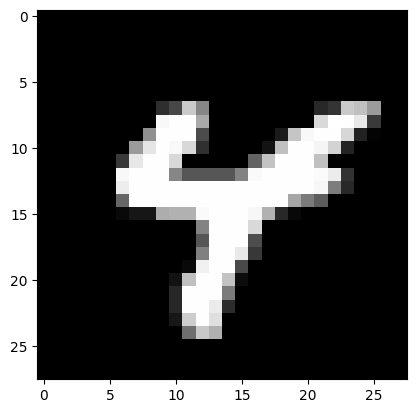

In [60]:
Val_index = 19
Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X_val[:,Val_index, None])
print('Prediction - ',Prediction(A2),' Actual Result : ',Y_val[Val_index])

image_array = X_val[:,Val_index].reshape(28,28)
plt.imshow(image_array, cmap='gray')

In [53]:
#now accuract on the validation data
Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X_val)
print('Accuracy - ',Accuracy(Prediction(A2), Y_val))

Accuracy -  0.88
